<a href="https://colab.research.google.com/github/AngelaChou1010/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
titanic = pd.read_csv(url, sep=',')
titanic
#type(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df = titanic.drop(columns = ["PassengerId","Name","Ticket","Cabin"])
titanic_df
#先做類別變數轉換, 再算共線性

#性別用label encoding轉換
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

#登船點用target encoding轉換
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder
te = TargetEncoder()
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])
#titanic_df.drop(columns="Survived", inplace=True)
titanic_df

#算共線性
titanic_corr = titanic_df.corr()
titanic_corr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


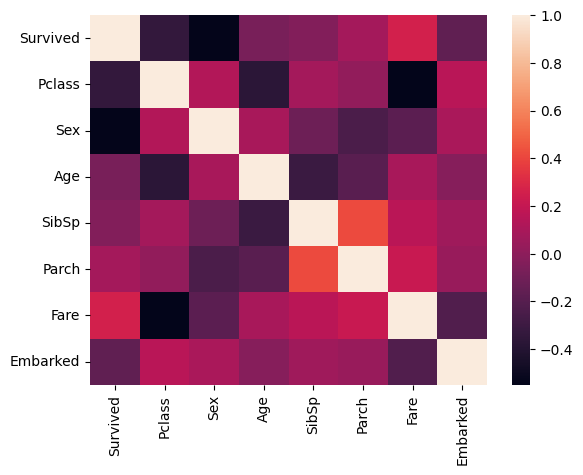

In [5]:
import seaborn as sns
sns.heatmap(titanic_corr);

In [25]:
#列出有遺失值record
titanic_df[titanic_df.isna().any(axis=1)]
#titanic_df.loc[:, titanic_df.isnull().any()]

#補遺失值(用平均值)
titanic_df["Age"] = round(titanic_df["Age"].fillna(titanic_df["Age"].mean()))
titanic_df

columns_X = set(titanic_df.columns) - {'Survived'}
columns_y = ['Survived']
#columns_X

train_X = titanic_df[list(columns_X)]
train_y = titanic_df[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
#交叉驗證平均準確率
print(scores.mean())



#log.fit(train_X,train_y)
#y_pred = log.predict()
#print(y_pred)

[0.78212291 0.78089888 0.78089888 0.76966292 0.82022472]
0.786761659657272
